# <center>Handwritten Digits Recognition using CNNs</center>

## Importing MNIST Dataset
### Training samples = 60,000 and Test samples = 10,000

In [1]:
import tensorflow as tf

In [2]:
mnist = tf.keras.datasets.mnist

## Dividing into Train and Test Datasets

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape # Verifiying train dataset has 60,000 samples

(60000, 28, 28)

In [5]:
x_test.shape # Verifiying test dataset has 10,000 samples

(10000, 28, 28)

In [6]:
import matplotlib.pyplot as plt

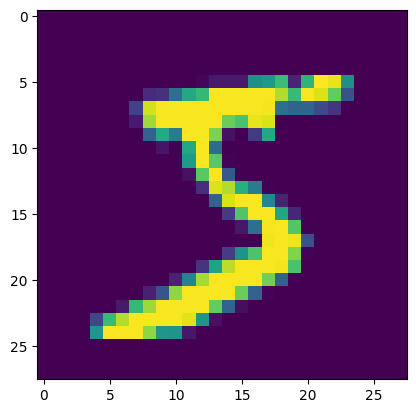

In [7]:
plt.imshow(x_train[0]) # Looking at first image in dataset

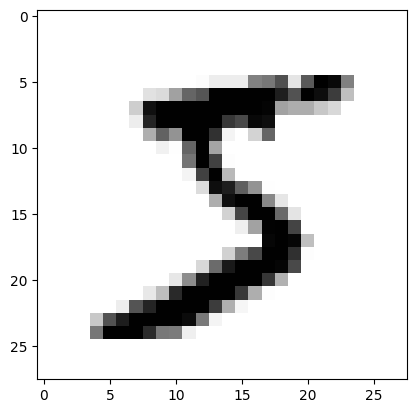

In [8]:
plt.imshow(x_train[0], cmap = plt.cm.binary) # Converting to a binary representation

## Checking values of each pixel before normalization
### Black = 0 and White = 255

In [9]:
print(x_train[0]) # Before normalization

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

## Pre-Processing
### Normalizing the dataset using built-in function of keras.utils


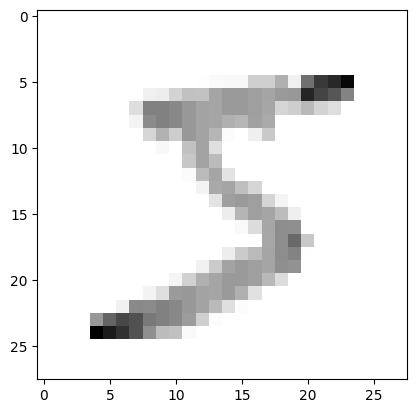

In [10]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)
plt.imshow(x_train[0], cmap = plt.cm.binary)

In [11]:
print(x_train[0]) # printing the normalized entry

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
print(y_train[0]) # verifying label

5


## Resizing Image to make it suitable for applying Convulution operation

In [13]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1, IMG_SIZE, IMG_SIZE, 1) # increasing one dimension for kernel/filter operation
x_testr = np.array(x_test).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # increasing one dimension for kernel/filter operation
print("Training samples dimension", x_trainr.shape)
print("Testing samples dimension", x_testr.shape)

Training samples dimension (60000, 28, 28, 1)
Testing samples dimension (10000, 28, 28, 1)


## Creating a Deep Learning Neural Network
### Training on 60,000 training samples of MNIST dataset

In [14]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, Input

In [15]:
'''
# implementing the neural network (sequentially adding layers theb)
model = Sequential()

# First Convulution layer 28 - 3 + 1 = 26 * 26
# first layer having 64 different filters, each of size (3x3)
model = Sequential([ Input(shape=(28, 28, 1)), Conv2D(32, (3, 3), activation='relu'),])

# Activation function to make it non-linear (removes values < 0 and allows values > 0)
model.add(Activation("relu"))
# Maxpooling - gets single maximum value of 2x2 matrix and drops rest
# propagating only max/dominant values to next layer
model.add(MaxPooling2D(pool_size = (2, 2)))

# Second Convulution layer 26 - 3 + 1 = 24 * 24
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Third Convulution layer 24 - 3 + 1 = 22 * 22
model.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2, 2)))

# Fully connected layer # 1 22 - 3 + 1 = 20 * 20
model.add(Flatten()) # before using fully connected layer, we need to flatten to convert from 2D to 1D
model.add(Dense(64)) # neural network layer
model.add(Activation("relu"))

# Fully connected layer # 2 
model.add(Dense(32)) # neural network layer
model.add(Activation("relu"))

# Fully connected layer # 3 
model.add(Dense(10)) # this last dense layer must be equal to 10 (as 10 possible digits)
model.add(Activation("softmax")) # Activation function changed to softmax as it gives class probabilitis for n classes (10 here)
'''

'\n# implementing the neural network (sequentially adding layers theb)\nmodel = Sequential()\n\n# First Convulution layer 28 - 3 + 1 = 26 * 26\n# first layer having 64 different filters, each of size (3x3)\nmodel = Sequential([ Input(shape=(28, 28, 1)), Conv2D(32, (3, 3), activation=\'relu\'),])\n\n# Activation function to make it non-linear (removes values < 0 and allows values > 0)\nmodel.add(Activation("relu"))\n# Maxpooling - gets single maximum value of 2x2 matrix and drops rest\n# propagating only max/dominant values to next layer\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\n\n# Second Convulution layer 26 - 3 + 1 = 24 * 24\nmodel.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))\nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\n\n# Third Convulution layer 24 - 3 + 1 = 22 * 22\nmodel.add(Conv2D(64, (3, 3), input_shape = x_trainr.shape[1:]))\nmodel.add(Activation("relu"))\nmodel.add(MaxPooling2D(pool_size = (2, 2)))\n\n# Fully connected layer # 

In [16]:
model = Sequential()

# First Convulution layer 28 - 3 + 1 = 26 * 26
model.add(Input(shape=x_trainr.shape[1:]))
# first layer having 64 different filters, each of size (3x3)
model.add(Conv2D(64, (3, 3)))
# Activation function to make it non-linear (removes values < 0 and allows values > 0)
model.add(Activation("relu"))
# Maxpooling - gets single maximum value of 2x2 matrix and drops rest
# propagating only max/dominant values to next layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Second Convulution layer 26 - 3 + 1 = 24 * 24
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Third Convulution layer 24 - 3 + 1 = 22 * 22
model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))


# Fully connected layer # 1 22 - 3 + 1 = 20 * 20
model.add(Flatten()) # before using fully connected layer, we need to flatten to convert from 2D to 1D
model.add(Dense(64)) # neural network layer
model.add(Activation("relu"))

# Fully connected layer # 2 
model.add(Dense(32)) # neural network layer
model.add(Activation("relu"))

# Fully connected layer # 3 
model.add(Dense(10)) # this last dense layer must be equal to 10 (as 10 possible digits)
model.add(Activation("softmax")) # Activation function changed to softmax as it gives class probabilitis for n classes (10 here)

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 26, 26, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 11, 11, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 3, 3, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 3, 3, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 1, 1, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81,066 (316.66 KB)

 Trainable params: 81,066 (316.66 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
print("Total Training Samples = ", len(x_trainr))

Total Training Samples =  60000


In [19]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=['accuracy'])

In [20]:
model.fit(x_trainr, y_train, epochs = 5, validation_split = 0.3)

Epoch 1/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 15s 11ms/step - accuracy: 0.7860 - loss: 0.6657 - val_accuracy: 0.9574 - val_loss: 0.1380
Epoch 2/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9644 - loss: 0.1199 - val_accuracy: 0.9714 - val_loss: 0.0933
Epoch 3/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - accuracy: 0.9753 - loss: 0.0785 - val_accuracy: 0.9743 - val_loss: 0.0854
Epoch 4/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 19s 14ms/step - accuracy: 0.9792 - loss: 0.0638 - val_accuracy: 0.9792 - val_loss: 0.0751
Epoch 5/5
1313/1313 ━━━━━━━━━━━━━━━━━━━━ 18s 13ms/step - accuracy: 0.9841 - loss: 0.0512 - val_accuracy: 0.9762 - val_loss: 0.0781


In [21]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10,000 testing samples: ", test_loss)
print("Validation accuracy on 10,000 testing samples", test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9737 - loss: 0.0915
Test loss on 10,000 testing samples:  0.08042538166046143
Validation accuracy on 10,000 testing samples 0.9783999919891357


In [22]:
predictions = model.predict([x_testr])
print(predictions) # these are predictions based on one hot encoding. So these are arrays containing softmax class probabilities

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
[[1.04530898e-11 5.36732880e-09 3.81998611e-08 ... 9.99998927e-01
  3.03019032e-09 1.11163956e-07]
 [4.82943287e-04 1.51351313e-04 9.98968840e-01 ... 2.25162090e-04
  3.94392628e-05 1.08645036e-05]
 [7.44872125e-07 9.99972165e-01 1.41911642e-06 ... 1.15953053e-05
  8.41035103e-07 2.64005450e-07]
 ...
 [3.13079651e-09 2.33078608e-05 2.80150232e-07 ... 1.95421289e-05
  1.10020128e-05 2.79068972e-05]
 [4.57917631e-05 1.65882909e-06 5.20645358e-07 ... 8.53195274e-07
  3.06479204e-02 6.32138199e-06]
 [2.51546007e-05 1.45591414e-07 3.13379201e-06 ... 8.04565969e-10
  2.76670151e-04 9.51190543e-07]]


In [23]:
# in order to understand the above result, we convert from one hot encoding. We use numpy for that
print(np.argmax([predictions[0]])) # argmax will return the maximum value index and return its value

7


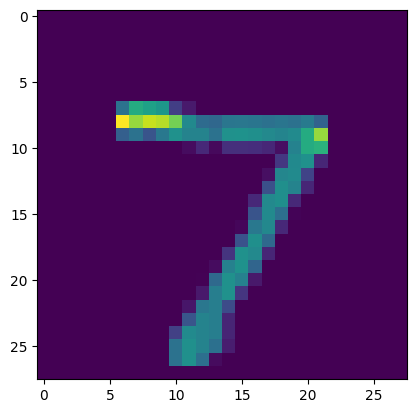

In [24]:
# Verifying answer
plt.imshow(x_testr[0])

In [25]:
# testing another random sample:
print(np.argmax([predictions[9982]]))

5


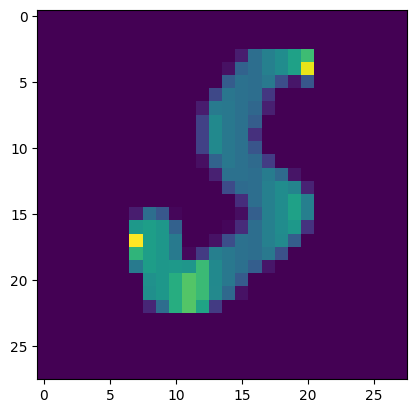

In [26]:
# checking above answer:
plt.imshow(x_testr[9982])

In [63]:
import cv2

In [99]:
img = cv2.imread('three.jpeg')

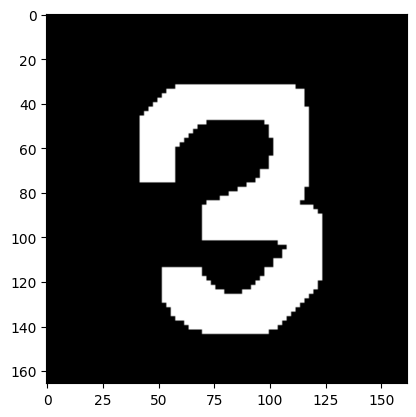

In [100]:
plt.imshow(img)

In [101]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [102]:
gray.shape

(166, 162)

In [103]:
resized = cv2.resize(gray, (28, 28), interpolation = cv2.INTER_AREA)

In [104]:
resized.shape

(28, 28)

In [105]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [106]:
newimg = np.array(newimg).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [107]:
newimg.shape

(1, 28, 28, 1)

In [108]:
predictions = model.predict(newimg)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [109]:
print(np.argmax(predictions))

3
